In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CNN

preprocessing

In [ ]:
!pip install emot --upgrade
# to convert emojis to text
!pip install emoji
#to expand a contracted words
!pip install demoji
!pip install contractions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
import emot
import nltk.data
import numpy as np
import pandas as pd
import re
import time
import string
import emoji
import demoji
import contractions
import nltk
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option("max_colwidth" ,220)
wn = nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stopwords = stopwords.words("english")
with open('/content/drive/MyDrive/hasoc/task4/assam/assamese.txt', encoding = 'utf-8') as f:
    assam_stopwords = f.readlines()
    for i in range(len(assam_stopwords)):
        assam_stopwords[i] = re.sub('\n','', assam_stopwords[i])
stopwords = english_stopwords + assam_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
demoji.download_codes()
def emo(text):
  temp=emoji.demojize(text,delimiters=(" "," "))
  temp=temp.replace("_","  ")
  return temp

<ipython-input-63-e00aa54160fe>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
demoji.download_codes()
def emo(text):
  try:
   temp=emoji.demojize(str(text),delimiters=(" "," "))
   temp=temp.replace("_","  ")
   return temp
  except IndexError:
        return ""

<ipython-input-64-82a5fb4117d1>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
punct="!#$%&\'()*+,-.’’/:;<=>?@[\\]^_`{|}~’“‘"

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', str(text))

In [ ]:
def clean_text(text):
    text = re.sub('@[a-zA-Z0-9]*', '', str(text))#to remove @ and its following word
    text = contractions.fix(text, slang=True)
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #to remove punctuation
    text="".join([word.lower() for word in text if word not in punct])
    text = "".join([word for word in text if not word.isdigit()])#to remove digit
    text = " ".join(word for word in text.split() if word not in stopwords)
    return text

In [ ]:
import pandas as pd

In [ ]:
asa_train=pd.read_csv('/content/drive/MyDrive/hasoc/task4/assam/train_A_AH_HASOC2023.csv')
asa_test=pd.read_csv('/content/drive/MyDrive/hasoc/task4/assam/test_A_AH_HASOC2023.csv')

In [ ]:
asa_train['clean_text'] = asa_train['text'].apply(lambda x:emo(x))
asa_train['clean_text'] = asa_train['clean_text'].apply(lambda x:remove_urls(x))
asa_train['clean_text'] = asa_train['clean_text'].apply(lambda x:clean_text(x))

In [ ]:
asa_train[asa_train['clean_text'] =='**********************']

,S. No.,text,task_1,clean_text


In [ ]:
asa_train['clean_text']

0                                                                                                                                      লাগিলে ইযাৰ পৰাই কলি লাগাম
1                                                                         আমি গেদা মই গেদা rolling floor laughing rolling floor laughing rolling floor laughing ।
2                                      মানুহে যেতিয়া নিজৰ জীৱন টো নিজৰ কাৰণে সমাজৰ কাৰণে দেশৰ কাৰণে পৃথিৱীৰ কাৰণে কিমান মূল্যবান বুজি নাপায় তেতিয়া এনেকুৱা হয়
3                                                                                                                   কতি খন কোন দিনা দেখা পাও তাকে বাত চায় আছো মই
4       কাপোৰ খন চাইকেল অহা মানুহজনৰ মুখত দলিয়াব লাগেনে বেছেৰাটো গুচি গল সেইকাৰণে বেয়া পায়। rolling floor laughing rolling floor laughing rolling floor laughing
                                                                                  ...                                                                            
4031                        

In [ ]:
asa_test['clean_text'] = asa_test['text'].apply(lambda x:emo(x))
asa_test['clean_text'] = asa_test['clean_text'].apply(lambda x:remove_urls(x))
asa_test['clean_text'] = asa_test['clean_text'].apply(lambda x:clean_text(x))

In [ ]:
X_train=asa_train['clean_text']
X_test=asa_test['clean_text']
y_train=asa_train['task_1']

In [ ]:
X_train.shape, X_test.shape

((4036,), (1009,))

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0

In [ ]:
t.word_index

{'<UNK>': 1,
 '।': 2,
 'ভাল': 3,
 'নাই': 4,
 'লাগে': 5,
 'আছে': 6,
 'কৰি': 7,
 'এই': 8,
 'কথা': 9,
 'কৰিব': 10,
 'বুলি': 11,
 'আমাৰ': 12,
 'হব': 13,
 'face': 14,
 'দিব': 15,
 'বহুত': 16,
 'মই': 17,
 'এটা': 18,
 'কাম': 19,
 'আমি': 20,
 'মানুহ': 21,
 'অসমৰ': 22,
 'নেকি': 23,
 'কৰা': 24,
 'অসম': 25,
 'নিজৰ': 26,
 '৷': 27,
 'বা': 28,
 'হল': 29,
 'ইমান': 30,
 'মোৰ': 31,
 'নে': 32,
 'লগত': 33,
 'ৰ': 34,
 'নহয়': 35,
 'হৈছে': 36,
 'গেদা': 37,
 'আপুনি': 38,
 'আপোনাৰ': 39,
 'অসমীয়া': 40,
 'ছোৱালী': 41,
 'সেই': 42,
 'কোনো': 43,
 'চাই': 44,
 'অসমত': 45,
 'কেলা': 46,
 'হিন্দু': 47,
 'এইবোৰ': 48,
 'বেছি': 49,
 'দৰে': 50,
 'লাগিব': 51,
 'তুমি': 52,
 'একো': 53,
 'অলপ': 54,
 'তাৰ': 55,
 'কিয়': 56,
 'বেয়া': 57,
 'অসমীয়া': 58,
 'দি': 59,
 'বোৰ': 60,
 'এনেকুৱা': 61,
 'সকলো': 62,
 'কৰে': 63,
 'কাৰণে': 64,
 'নহয়': 65,
 'কৈ': 66,
 'টো': 67,
 'হয়': 68,
 'কিবা': 69,
 'তোমাৰ': 70,
 'মানুহে': 71,
 'ভাই': 72,
 'tears': 73,
 'joy': 74,
 'কব': 75,
 'ও': 76,
 'নিউজ': 77,
 'হলে': 78,
 'rolling': 79,
 'দাদা': 80,
 

In [ ]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t1.word_index['<UNK>']

(('গেদাই।', 11010), ('<PAD>', 0), 1)

In [ ]:
train_sequences = t.texts_to_sequences(X_train)

In [ ]:
train_sequences

[[237, 3665, 342, 1641, 3666],
 [20, 37, 17, 37, 79, 86, 87, 79, 86, 87, 79, 86, 87, 2],
 [71,
  1033,
  26,
  413,
  67,
  26,
  64,
  359,
  64,
  314,
  64,
  1253,
  64,
  96,
  2267,
  150,
  448,
  360,
  61,
  68],
 [2268, 88, 159, 2269, 151, 486, 449, 3667, 2270, 265, 17],
 [152,
  88,
  3668,
  315,
  2271,
  1034,
  3669,
  3670,
  3671,
  1254,
  213,
  601,
  92,
  1255,
  79,
  86,
  87,
  79,
  86,
  87,
  79,
  86,
  87],
 [3672, 3673, 1642, 2272, 2273, 1035, 767, 1036],
 [3674, 875, 1643],
 [3675, 65, 22, 3676],
 [3677, 3678, 3679, 3680, 4, 27],
 [81, 602, 386, 1644, 188, 112, 1256, 118],
 [3681, 67, 61, 65, 414, 768, 7, 290, 487, 488, 43, 450, 3682, 198],
 [17,
  2274,
  361,
  181,
  3683,
  2275,
  3684,
  674,
  3685,
  2276,
  3686,
  2277,
  214,
  3687,
  35,
  2277,
  3688,
  3689,
  362,
  3690,
  489,
  3691,
  160,
  3692],
 [675,
  547,
  1037,
  1645,
  316,
  8,
  1257,
  112,
  1646,
  2278,
  137,
  1038,
  112,
  266,
  3693,
  1258,
  451,
  2],
 [3694

In [ ]:
test_sequences = t.texts_to_sequences(X_test)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=11011
Number of Documents=4036


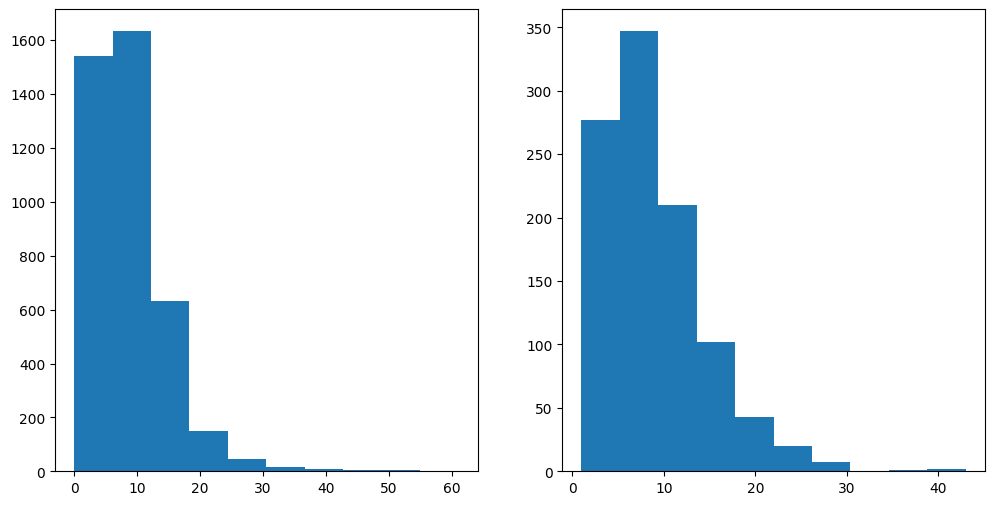

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
# pad dataset to a maximum review length in words
X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((4036, 1000), (1009, 1000))

In [ ]:
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [ ]:
y_train = le.fit_transform(y_train)


In [ ]:
tt = [1,1,1, 0, 1]
print(le.inverse_transform(tt))

['NOT' 'NOT' 'NOT' 'HOF' 'NOT']


In [ ]:
VOCAB_SIZE1 = len(t.word_index)

In [ ]:
EMBED_SIZE = 300
EPOCHS=5
BATCH_SIZE=128

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE1, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 300)         3303300   
                                                                 
 conv1d_3 (Conv1D)           (None, 1000, 128)         153728    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 500, 128)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 250, 32)          

In [ ]:
# Fit the model
model.fit(X_train, y_train,
          validation_split=0.1,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1)

Epoch 1/5
29/29 [==============================] - 126s 4s/step - loss: 0.6837 - accuracy: 0.5732 - val_loss: 0.6797 - val_accuracy: 0.5817
Epoch 2/5
29/29 [==============================] - 114s 4s/step - loss: 0.6207 - accuracy: 0.6401 - val_loss: 0.6523 - val_accuracy: 0.6411
Epoch 3/5
29/29 [==============================] - 113s 4s/step - loss: 0.2846 - accuracy: 0.8893 - val_loss: 0.7139 - val_accuracy: 0.6658
Epoch 4/5
29/29 [==============================] - 109s 4s/step - loss: 0.0811 - accuracy: 0.9771 - val_loss: 1.3631 - val_accuracy: 0.6634
Epoch 5/5
29/29 [==============================] - 121s 4s/step - loss: 0.0294 - accuracy: 0.9915 - val_loss: 1.5505 - val_accuracy: 0.6683


In [ ]:
# predictions = model.predict_classes(X_test1).ravel()
predictions = (model.predict(X_test) > 0.5).astype("int32")
# predictions[:10]

32/32 [==============================] - 9s 289ms/step


In [ ]:
predictions = ['HOF' if item == 1 else 'NOT' for item in predictions]
predictions[:10]

['NOT', 'NOT', 'HOF', 'NOT', 'NOT', 'HOF', 'NOT', 'NOT', 'HOF', 'NOT']

In [ ]:
#Submission
# to create .csv file consisting of tweet ids and predicted labels
y_pred_df= pd.DataFrame(data=predictions, columns=['predictions'])
Submisssion_assam = pd.DataFrame()
Submisssion_assam['S. No.'] = asa_test['S. No.']
Submisssion_assam['task_1 '] = y_pred_df
Submisssion_assam.to_csv('/content/drive/MyDrive/MUCS_test_assam_run13.csv',index = None)